# U-Net training
### Author: Pinglei He
This is the notebook of our first attempt to train our u-net model using images generated using the `data-augmentation.ipynb` notebook.

In [1]:
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
from tqdm import tqdm # progress bar
from torch.optim import Adam

# custom modules
from model import (StentDataset, # custom dataset
                   ImageAugmentation, # custom image generator
                   UNet) # our PyTorch U-Net model

## Data Augmentation

In [2]:
# custom image generator
image_generator = ImageAugmentation(base_image_path="data/dataset/base_png")

# generate train images
image_generator.generate_input_images(n_images=100,
                                      save_path="data/dataset/train",
                                      generate_input=True,
                                      print_progress=True)

# generate test images
image_generator.generate_input_images(n_images=20,
                                      save_path="data/dataset/test",
                                      generate_input=True,
                                      print_progress=False)

The data path already has a 'y' directory! Please select a path that doesn't contain an output nor input directory yet.
The data path already has a 'y' directory! Please select a path that doesn't contain an output nor input directory yet.


In [3]:
# pytorch dataset object
dataset = StentDataset(input_path="data/dataset/train/x",
                       target_path="data/dataset/train/y") # 1000 images

In [4]:
model = UNet(in_channels=1, out_channels=1)
model.double()
training_loader = DataLoader(dataset, batch_size=1, shuffle=True)
criterion = nn.MSELoss()
optimizer = Adam(model.parameters(), lr=0.001)

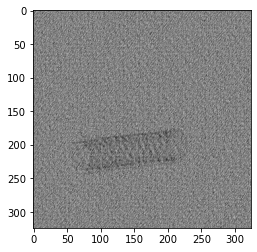

In [5]:
# initial prediction image
plt.imshow(dataset[26][0], cmap="gray")
prediction = model(dataset[26][0].reshape(1, 512, 512))
plt.imshow(prediction.detach().numpy()[0], cmap="gray")

In [ ]:
# parameters
epochs = 6
batch_size = 1

# training
losses = []
for epoch in range(epochs):
    for i, data in enumerate(tqdm(training_loader)):
        # get the inputs
        inputs, targets = data
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        # print statistics
        losses.append(loss.item())
        print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
              .format(epoch + 1, epochs, i + 1, len(training_loader), loss.item()))